In [ ]:
#Descargar librerías (Necesario en Colab)
!pip install dash==2.0.0
!pip install dash-html-components
!pip install dash-core-components
!pip install dash-table
!pip install jupyter-dash
!pip install dash-bootstrap-components
!pip install --upgrade plotly

In [ ]:
### Descargamos los datsets ###

#Datasets Completos (No necesario para el análisis, pero sí en caso de desear hacer las muestras)
#! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=10POg85oJffLnDJXVjaXhOrwwx3sQaHZF' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=10POg85oJffLnDJXVjaXhOrwwx3sQaHZF" -O RAW_recipes.csv.zip
#! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1VHcjHRqrgIqSmAu_orq-vohmwgu4obQv' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1VHcjHRqrgIqSmAu_orq-vohmwgu4obQv" -O PP_recipes.csv.zip


#Información de las recetas
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1iWapfGtNyn98RHnvX46wmI_ret8_TBYl' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1iWapfGtNyn98RHnvX46wmI_ret8_TBYl" -O clean_recipes_sample.pkl

#Información nutrimental
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1XgWyi71W4Y7GFybFOMHQrkzRWrRCqn9X' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1XgWyi71W4Y7GFybFOMHQrkzRWrRCqn9X" -O clean_nutrition_sample.pkl
#Información nutrimental rango 2
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Q_hH3BpNiEfid3U0--Pbu884dryFicoO' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Q_hH3BpNiEfid3U0--Pbu884dryFicoO" -O clean_nutrition2d_sample.pkl

#Información de ingredientes
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1U_LI8tTTyO_y5GUqeHyoYxDq_tP69Pca' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1U_LI8tTTyO_y5GUqeHyoYxDq_tP69Pca" -O clean_recipesIngr_sample.pkl
#Información de ingredientes
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1MbtOxT1NPO5eWPLVnu8-U8Z7_4qVezAv' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1MbtOxT1NPO5eWPLVnu8-U8Z7_4qVezAv" -O ingr_map.pkl
#Información de los ingredientes rango 2
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1TlcJsXX-EiPANql4AA7rKelExawmJW4P' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1TlcJsXX-EiPANql4AA7rKelExawmJW4P" -O clean_ingredients2d_sample.pkl

#Borramos las cookies
!  rm -rf /tmp/cookies.txt


In [ ]:
#Importamos las librerías necesarias
import matplotlib.pyplot as plt
import mlxtend as mlx
import mlxtend.frequent_patterns as FP
import mlxtend.preprocessing as mlp
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans,MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

# ReciPy
#### Jazmín López Chacón

Lo primero es mencionar un poco el transfondo de los datos que se van a a utilizar. Se usarán los datos publicados por Shuyang Li en Kaggle, los cuales son provinientes de Food.com, que es una página **estadounidense** de recetas de cocina.</br>

Conforme vayamos cargando los datos se irán dando más detalles sobre la estructura de los datos.

# Creación de la muestra
Dado a los límites computaciones que tenemos, no es posible hacer un análisis completo usando todas las recetas, por lo que se tomará una muestra aleatoria del 10% de los datos. </br>

Lo primero es cargar los datos que se tienen guardados en un formato zip.

In [ ]:
! unzip ./PP_recipes.csv.zip
! unzip ./RAW_recipes.csv.zip

Archive:  ./PP_recipes.csv.zip
replace PP_recipes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  ./RAW_recipes.csv.zip
replace RAW_recipes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Dentro de los datos, algunos de ellos se nos presentan como listas, por ello es necesario crear una función que nos permita manejarlas como un array de numpy, la utilidad de esto es que será más fácil al momento de reducir dimensionalidad.

In [ ]:
from ast import literal_eval

def to_array(x):
    return np.array(literal_eval(x))

Cargamos los datos de las recetas procesadas que contienen menos recetas y usaremos para compararlas con aquellas que no lo tienen.

In [ ]:
#Recetas preprocesadas
arrays_ingr={'ingredient_ids':to_array}
recipesIngredientes  = pd.read_csv('./PP_recipes.csv', index_col='id', converters=arrays_ingr)

In [ ]:
#Recetas "crudas"
arrays_recipe={'tags':to_array, 'nutrition':to_array, 'steps':to_array, 'ingredients':to_array}
recipes = pd.read_csv('./RAW_recipes.csv', index_col='id', converters=arrays_recipe)
#Asegurar que sean las mismas que las preprocesadas
recipes = recipes.loc[recipesIngredientes.index]

## Recetas "crudas"
Dentro de este conjunto nos encontramos con la siguiente información de las recetas:
+ nombre
+ minutos de preparación
+ id del contribuidor
+ fecha de subida
+ etiquetas 
+ información nutrimental
+ cantidad de pasos
+ pasos
+ ingredientes
+ cantidad de ingredientes

Se consideran crudas porque los textos están tal y como los subió el usuario a la plataforma

Revisemos algunos de los datos:

In [ ]:
recipes.head(10)

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
id,,,,,,,,,,,
424415,aromatic basmati rice rice cooker,61,496803,2010-05-10,"[weeknight, time-to-make, course, main-ingredi...","[228.2, 2.0, 2.0, 8.0, 9.0, 1.0, 15.0]",6,"[rinse the rice in a fine strainer , then drai...",from the ultimate rice cooker cookbook. the a...,"[basmati rice, water, salt, cinnamon stick, gr...",5
146223,pumpkin pie a la easy,55,229619,2005-11-25,"[60-minutes-or-less, time-to-make, course, pre...","[249.4, 16.0, 92.0, 8.0, 11.0, 27.0, 11.0]",10,"[preheat oven to 350, combine flour , oats , b...",this is a pampered chef recipe for their stone...,"[flour, oats, brown sugar, pecans, butter, egg...",12
312329,cheesy tomato soup with potatoes,25,621626,2008-07-07,"[30-minutes-or-less, time-to-make, course, mai...","[351.3, 34.0, 15.0, 50.0, 25.0, 70.0, 8.0]",6,"[pour the broth & water into a large pot, add ...",after modifying another recipe i came up with ...,"[chicken broth, water, salt, black pepper, oni...",15
74301,mini tacos,15,60989,2003-10-29,"[15-minutes-or-less, time-to-make, course, mai...","[79.7, 5.0, 2.0, 11.0, 11.0, 7.0, 2.0]",8,"[cook hamburger until browned, drain the fat a...",these can be a easy appetizer or a light dinne...,"[wonton wrappers, hamburger, taco seasoning, s...",8
76272,rosemary s hanky panky s,20,93444,2003-11-12,"[30-minutes-or-less, time-to-make, course, pre...","[240.7, 29.0, 9.0, 28.0, 27.0, 42.0, 0.0]",5,"[fry ground beef and sausage until browned, dr...",my girlfriend rosemary gave me this wonderfull...,"[ground beef, ground sausage, velveeta cheese,...",4
465171,pink bavarian crown strawberry dream supreme,250,107135,2011-09-29,"[course, gelatin, desserts]","[548.9, 20.0, 282.0, 25.0, 16.0, 52.0, 34.0]",15,[mix strawberry jell-o with boiling water then...,"made with dream whip, strawberry jell-o and an...","[strawberry jell-o gelatin dessert, water, str...",10
163861,tom and kelly s chicken fried steak,18,113941,2006-04-11,"[30-minutes-or-less, time-to-make, course, mai...","[781.6, 82.0, 6.0, 12.0, 94.0, 95.0, 8.0]",11,"[have your butcher ""cube"" 2 lean boneless pork...","you'll need your butcher's help with this, but...","[boneless pork chops, flour, salt, pepper, egg...",9
186383,chocolate oat cookie bars,40,225997,2006-09-15,"[60-minutes-or-less, time-to-make, course, pre...","[198.7, 13.0, 62.0, 2.0, 5.0, 11.0, 9.0]",8,"[preheat oven to 350 degrees, whisk together d...",these are made with oil instead of butter/marg...,"[flour, oats, baking powder, baking soda, salt...",10
116395,tropical lemon cream bars,50,115658,2005-04-12,"[60-minutes-or-less, time-to-make, course, pre...","[413.9, 32.0, 138.0, 8.0, 16.0, 53.0, 16.0]",16,"[crust:, combine flour , confectioners sugar ,...",a unique blend of ingredients makes this a won...,"[flour, confectioners' sugar, powdered milk, c...",13


Aunque ya sabemos qué contiene este conjunto, vale la pena revisar la estructura de las columnas.

In [ ]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178265 entries, 424415 to 263840
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            178265 non-null  object
 1   minutes         178265 non-null  int64 
 2   contributor_id  178265 non-null  int64 
 3   submitted       178265 non-null  object
 4   tags            178265 non-null  object
 5   nutrition       178265 non-null  object
 6   n_steps         178265 non-null  int64 
 7   steps           178265 non-null  object
 8   description     174311 non-null  object
 9   ingredients     178265 non-null  object
 10  n_ingredients   178265 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 16.3+ MB


Al no tener instancias con valores nulos podemos empezar a hacer un análisis.

Debemos destacar que al momento en el que un usuario crea una receta, la plataforma de Food.com calcula esta información según la cantidad que se requiera de cada ingrediente para una porción, y es el usuario el que escribe la cantidad de porciones que representa la receta. Por ello debemos tener en cuenta que los valores presentados no son necesariamente los verdaderos para una porción de las recetas.

### Revisión de la información nutrimental para limpiar los datos
Si revisamos la documentación nos encontramos que la información nutrimental se nos presenta en una lista donde los integrantes representan lo siguiente:
0. Calorías
1. Grasas Totales (porcentaje de valor diario)
2. Azúcar (porcentaje de valor diario)
3. Sodio (porcentaje de valor diario)
4. Proteína (porcentaje de valor diario)
5. Grasa Saturada (porcentaje de valor diario)
6. Carbohidratos (porcentaje de valor diario)

La ventaja de que la mayoría de la información nutimental esté respecto al porcentaje de valor diario es que en sí ya está normalizada, sin embargo se pierden valores decimales que nos podrían servir para tener a las instancias más separadas entre sí y poder hacer un agrupamiento más eficiente. Con este pequeño detalle podemos ver que realmente no tenemos datos totalmente "crudos".

In [ ]:
#Creamos una matriz con toda la información nutrimental
nInfo = np.array(list(recipes['nutrition']))
#Creamos una tabla con lo encontrado sobre la información nutrimental
nutrition = pd.DataFrame(index=recipes.index)
nutrition['cal'] = nInfo[:,0]
nutrition['tfatPDV'] = nInfo[:,1]
nutrition['sugarPDV'] = nInfo[:,2]
nutrition['sodiumPDV'] = nInfo[:,3]
nutrition['proteinPDV'] = nInfo[:,4]
nutrition['sfatPDV'] = nInfo[:,5]
nutrition['carbsPDV'] = nInfo[:,6]

Revisemos algunas instancias para ver cómo quedaron.

In [ ]:
nutrition.tail(10)

,cal,tfatPDV,sugarPDV,sodiumPDV,proteinPDV,sfatPDV,carbsPDV
id,,,,,,,
44658,272.1,28.0,9.0,11.0,20.0,52.0,5.0
420424,43.5,0.0,22.0,12.0,6.0,0.0,3.0
98163,187.8,19.0,24.0,2.0,4.0,23.0,6.0
16425,489.2,57.0,9.0,78.0,57.0,72.0,2.0
197110,72.4,4.0,25.0,4.0,1.0,8.0,3.0
323143,304.1,30.0,0.0,11.0,10.0,60.0,8.0
149114,235.9,26.0,3.0,19.0,35.0,37.0,0.0
34200,577.5,51.0,26.0,38.0,84.0,83.0,8.0
30618,240.1,5.0,96.0,12.0,41.0,5.0,10.0


Se ve bastante bien, sin embargo, como los porcentajes de valor diario dependen de las porciones que hayan escrito los usuarios y por defecto se toma una porción, debemos detectar si hay recetas que tengan un porcentaje fuera de lo "normal", es decir, si nos topamos con una receta que tenga un 280% de valor diario de azúcar, podríamos considerarla como ruido. </br>

Una forma de ver qué tan fuera de lo esperado están nuestros datos, es revisando algunas propiedades estadísticas de nuestros datos.

In [ ]:
nutrition.describe()

,cal,tfatPDV,sugarPDV,sodiumPDV,proteinPDV,sfatPDV,carbsPDV
count,178265.000000,178265.000000,178265.000000,178265.000000,178265.000000,178265.000000,178265.000000
mean,459.872789,34.800752,80.832715,28.353451,34.429176,43.931591,15.101321
std,1247.492325,64.084721,894.127039,99.721266,54.286427,89.468462,90.947445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,177.300000,9.000000,9.000000,5.000000,7.000000,7.000000,4.000000
50%,310.700000,20.000000,24.000000,15.000000,19.000000,22.000000,9.000000
75%,504.900000,40.000000,65.000000,32.000000,51.000000,51.000000,16.000000
max,434360.200000,4331.000000,362729.000000,14664.000000,6552.000000,6875.000000,36098.000000


Vemos que todos los atributos relacionados al porcentaje de valor diario tienen valores "normales" en el 75% de los datos, así que no sería descabellado dejar a un lado aquellos que sobrepasen el 100%, sin embargo, por el hecho de que las personas no tengan un conocimiento previo sobre el aporte nutrimental de las recetas, vamos a aumentar la cota dependiendo del atributo, este aumento dependerá de los valores que nos arrojó para el tercer cuartil. Las cotas usadas serán:
+ Grasas totales PVD < 150
+ Azúcares PVD < 200
+ Sodio PVD < 125
+ Proteína PVD < 175
+ Grasas Saturadas PVD < 175
+ Carbohidratos PVD < 100

In [ ]:
outliers = nutrition[(nutrition.tfatPDV>150)|(nutrition.sugarPDV>200)|(nutrition.sodiumPDV>125)|(nutrition.proteinPDV>175)|(nutrition.sfatPDV>175)|(nutrition.carbsPDV>100)]
outliers

,cal,tfatPDV,sugarPDV,sodiumPDV,proteinPDV,sfatPDV,carbsPDV
id,,,,,,,
465171,548.9,20.0,282.0,25.0,16.0,52.0,34.0
288683,713.6,108.0,40.0,4.0,24.0,218.0,8.0
356953,3732.8,85.0,264.0,212.0,183.0,153.0,236.0
227025,424.0,26.0,209.0,6.0,27.0,37.0,19.0
110568,463.0,20.0,261.0,3.0,8.0,39.0,29.0
...,...,...,...,...,...,...,...
97737,550.0,94.0,2.0,18.0,1.0,194.0,0.0
243117,1318.4,145.0,408.0,66.0,21.0,293.0,36.0
126375,783.6,43.0,343.0,29.0,11.0,20.0,42.0


Son  18 522 las recetas que puedo considerar como "ruido", sin embargo, al haber 178 265 recetas en total, eliminar el ruido no me afecta de manera considerable. Es importante destacar que estas recetas, a pesar de ser "ruido", me pueden proporcionar información sobre la comida estadounidense. Podemos ver esto con algunos valores estadísticos.

In [ ]:
outliers.describe()

,cal,tfatPDV,sugarPDV,sodiumPDV,proteinPDV,sfatPDV,carbsPDV
count,18522.000000,18522.000000,18522.000000,18522.000000,18522.000000,18522.000000,18522.000000
mean,1596.346134,122.639348,456.014577,96.433161,72.836465,160.751539,62.265954
std,3621.197293,162.813007,2742.697962,294.406644,136.480289,230.574968,276.596298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,622.025000,27.000000,67.000000,13.000000,13.000000,29.000000,20.000000
50%,1055.100000,78.500000,244.000000,40.000000,38.000000,92.000000,33.000000
75%,1913.100000,164.000000,495.000000,114.000000,99.000000,207.000000,74.000000
max,434360.200000,4331.000000,362729.000000,14664.000000,6552.000000,6875.000000,36098.000000


Sin duda, el azúcar es lo que más resalta de este subconjunto. A pesar de que la cota del azúcar haya sido la más alta, dentro de este subconjunto de ruido, el 50% de los datos la sobrepasan, lo que nos dice que el exceso de azúcar puede ser la principal cuasa de que estas recetas hayan caído en la categoría de "outlier"

Lo siguiente es eliminar este ruido.

In [ ]:
nutrition.drop(outliers.index,axis=0,inplace=True)

Ahora que ya tenemos los datos limpios, empezamos a hacer la muestra, recordando que solo tomaremos el 10% del total.

In [ ]:
#Establecemos el directorio en el que vamos a guardar todo
path = './'

In [ ]:
n=nutrition.shape[0] #Cantidad de recetas
n_samples = n//10 # Recetas de la muestra
idx_samples = np.random.choice(nutrition.index,n_samples, replace=False) #Selección de recetas

In [ ]:
#Creación de los archivos de muestra
recipes.loc[idx_samples].to_pickle(path+'clean_recipes_sample.pkl')
recipesIngredientes.loc[idx_samples].to_pickle(path+'clean_recipesIngr_sample.pkl')

# Análisis sobre la información nutrimental
Lo primero es cargar nuestro dataset de recetas, que es donde encontamos esta información.

In [ ]:
folder = './'

In [ ]:
recipes = pd.read_pickle(folder+'clean_recipes_sample.pkl')

Revisamos algunos de los valores.

In [ ]:
recipes.head(10)

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
id,,,,,,,,,,,
174710,sables norman sugar cookies,105,182010,2006-06-26,"[time-to-make, course, main-ingredient, cuisin...","[199.1, 14.0, 33.0, 2.0, 6.0, 27.0, 8.0]",11,[sift the flour and the sugar into a large bow...,a classic sugar cookie found throughout norman...,"[flour, unsalted butter, sugar, egg yolks, sal...",7
139229,heavenly angel hair pasta,25,37449,2005-09-28,"[30-minutes-or-less, time-to-make, course, mai...","[193.5, 16.0, 16.0, 3.0, 11.0, 7.0, 7.0]",9,"[combine the tomatoes , spinach , garlic , lim...","delicate angel hair pasta served with spinach,...","[tomatoes, baby spinach, garlic cloves, lime, ...",10
151551,three sisters harvest stew,35,260451,2006-01-13,"[60-minutes-or-less, time-to-make, course, mai...","[176.9, 8.0, 8.0, 9.0, 10.0, 3.0, 9.0]",8,"[in a large stew pot , heat the olive oil, add...",this comes from a great book. cooking like a g...,"[olive oil, water, onion, garlic cloves, carro...",12
233304,quicky pickles,15,37449,2007-06-07,"[15-minutes-or-less, time-to-make, course, mai...","[21.8, 0.0, 19.0, 9.0, 0.0, 0.0, 1.0]",6,"[place cucumbers and tarragon in a quart jar, ...",adapted from martha stewart's living magazine....,"[kirby cucumbers, fresh tarragon, white wine v...",6
165755,chicken salad with grapefruit and pistachios,20,197023,2006-04-25,"[30-minutes-or-less, time-to-make, course, mai...","[637.9, 56.0, 22.0, 7.0, 122.0, 31.0, 6.0]",11,[slice each chicken breast into three escalope...,a light and refreshing starter for a dinner pa...,"[skinless chicken breasts, extra virgin olive ...",13
114596,frozen lime pie,10,52282,2005-03-29,"[15-minutes-or-less, time-to-make, course, mai...","[486.4, 39.0, 162.0, 15.0, 22.0, 64.0, 18.0]",6,[beat cream cheese in a medium bowl until smoo...,easy no cook dessert.,"[graham cracker pie crust, condensed milk, eva...",7
64448,cube steak with gravy,525,79036,2003-06-12,"[weeknight, time-to-make, preparation, crock-p...","[55.8, 3.0, 4.0, 0.0, 1.0, 1.0, 2.0]",10,[place flour in a large resealable plastic bag...,i never liked cube steaks until i found this r...,"[all-purpose flour, beef cube steaks, vegetabl...",9
284269,lemon and cream cheese frosting,5,716192,2008-02-05,"[15-minutes-or-less, time-to-make, course, mai...","[249.2, 20.0, 118.0, 4.0, 5.0, 41.0, 10.0]",5,[bring cream cheese to room temperature then b...,i served this on white cupcakes for a baby sho...,"[cream cheese, powdered sugar, lemon, zest of,...",4
275510,peasant turnip slaw with sweet hot mustard dre...,75,384041,2008-01-02,"[time-to-make, course, main-ingredient, prepar...","[293.3, 28.0, 86.0, 8.0, 7.0, 6.0, 10.0]",6,"[peel turnips and carrot, shred or julienne cu...",i grow turnips for their delicious greens. but...,"[cabbage, turnips, carrot, celery, sugar, whit...",10


Lo siguiente es recrear la tabla de nutrición.

In [ ]:
#Creamos una matriz con toda la información nutrimental
nInfo = np.array([info for info in recipes['nutrition']])
#Creamos una tabla con lo encontrado sobre la información nutrimental
nutrition = pd.DataFrame(index=recipes.index)
nutrition['cal'] = nInfo[:,0]
nutrition['tfatPDV'] = nInfo[:,1]
nutrition['sugarPDV'] = nInfo[:,2]
nutrition['sodiumPDV'] = nInfo[:,3]
nutrition['proteinPDV'] = nInfo[:,4]
nutrition['sfatPDV'] = nInfo[:,5]
nutrition['carbsPDV'] = nInfo[:,6]

Revisamos algunos valores

In [ ]:
nutrition.tail(10)

,cal,tfatPDV,sugarPDV,sodiumPDV,proteinPDV,sfatPDV,carbsPDV
id,,,,,,,
283085,88.8,3.0,10.0,9.0,8.0,5.0,3.0
184383,438.6,12.0,11.0,30.0,29.0,18.0,24.0
306507,252.1,16.0,13.0,1.0,15.0,7.0,10.0
260375,137.2,11.0,64.0,1.0,4.0,17.0,5.0
88140,163.4,5.0,64.0,10.0,6.0,5.0,10.0
478625,470.6,21.0,9.0,10.0,131.0,13.0,2.0
91747,580.6,41.0,10.0,24.0,101.0,70.0,10.0
226550,576.5,59.0,5.0,28.0,101.0,33.0,1.0
119772,184.2,1.0,0.0,12.0,6.0,0.0,13.0


Vemos algunas estadísticas.

In [ ]:
nutrition.describe()

,cal,tfatPDV,sugarPDV,sodiumPDV,proteinPDV,sfatPDV,carbsPDV
count,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000
mean,326.510260,24.497809,37.019031,20.393702,29.708213,30.257794,9.587830
std,218.905791,22.592140,42.047484,21.077093,30.478963,31.808183,8.313063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,164.800000,8.000000,9.000000,5.000000,7.000000,6.000000,3.000000
50%,283.200000,18.000000,21.000000,14.000000,17.500000,20.000000,8.000000
75%,437.100000,34.000000,50.000000,29.000000,47.000000,44.000000,14.000000
max,1822.600000,149.000000,200.000000,125.000000,175.000000,175.000000,99.000000


Se ve bastante bien, por lo que podemos proseguir. </br>

Ahora vamos a empezar a hacer el agrupamiento, para ello vamos a considerar al menos 5 grupos:

La primera medida para ver el rango de grupos que podemos crear, será usar el método del codo, que irá desde 2 grupos hasta 15 como máximo.

In [ ]:
Evisualizer = KElbowVisualizer(KMeans(random_state=39), k=(2,15))

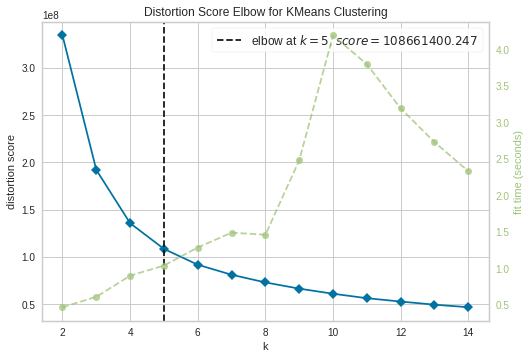

In [ ]:
Evisualizer.fit(nutrition)
Evisualizer.show()

Vemos que hay un codo cuando $K=5$, sin embargo, valdría la pena revisar lo que pasa con $K=4$ .

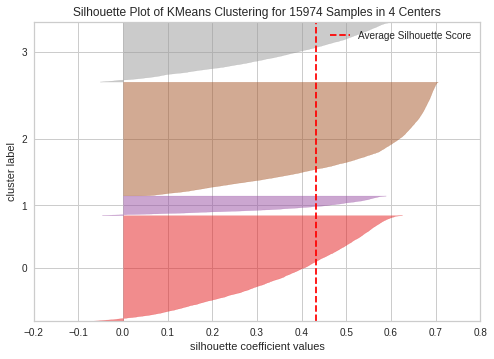

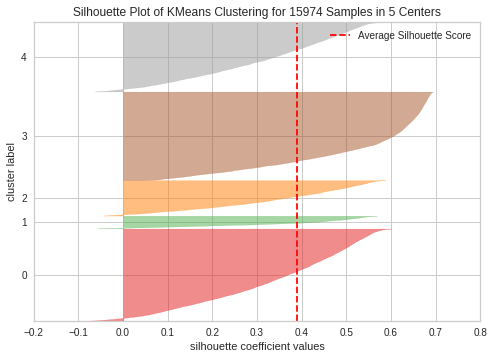

In [ ]:
for k in range(4,6):
    svisualizer = SilhouetteVisualizer(KMeans(k, random_state=39))
    svisualizer.fit(nutrition)        
    svisualizer.show()

Podemos ver que resulta más conveniente usar $k=4$ por el promedio y la silueta que se forma. A pesar que al revisar el codo nos sugería $k=5$

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=39).fit(nutrition)

In [ ]:
nutrition['cluster']=kmeans.predict(X=nutrition)

Veamos cómo quedó la distribución

In [ ]:
paleta = sns.color_palette('gist_heat',4)
paleta

[(0.30000000000000004, 0.0, 0.0),
 (0.6000000000000001, 0.0, 0.0),
 (0.8999999999999999, 0.19999999999999996, 0.0),
 (1.0, 0.6000000000000001, 0.20000000000000018)]

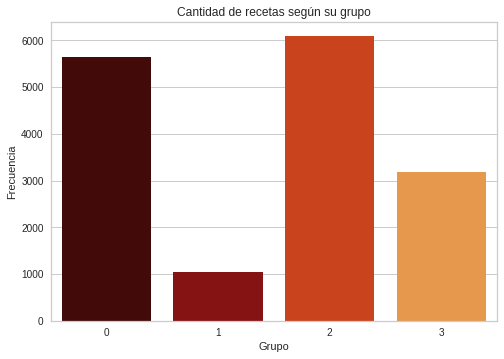

In [ ]:
sns.countplot(x="cluster", data=nutrition, palette=paleta)
plt.title("Cantidad de recetas según su grupo")
plt.xlabel("Grupo")
plt.ylabel("Frecuencia")
plt.show()

Podemos ver que hay una distribución que no es precisamente pareja, por lo que valdría la pena revisar cómo se ven las instancias clasificadas en dos dimensiones. </br>

Para ello haremos uso de nuestra matriz de Numpy que declaramos anteriormente.

In [ ]:
import dask.array as da
import dask

In [ ]:
dnInfo = da.from_array(np.array(nutrition), chunks=(1000, 1000))
u, s, v = da.linalg.svd(dnInfo)

In [ ]:
U = u.compute()[:,:2]
S = s.compute()[:2]

In [ ]:
nutri_truncated = U@np.diag(S)
nutri_reducedDF = pd.DataFrame(index=nutrition.index)
nutri_reducedDF['x'] = nutri_truncated[:,0]
nutri_reducedDF['y'] = nutri_truncated[:,1]
nutri_reducedDF['cluster'] = nutrition['cluster']

In [ ]:
#Guardamos los Df
nutrition.to_pickle(folder+'clean_nutrition_sample.pkl')
nutri_reducedDF.to_pickle(folder+'clean_nutrition2d_sample.pkl')

## Resultados de agrupamiento

In [ ]:
#Cargamos lo que habíamos guardado
nutrition = pd.read_pickle(folder+'clean_nutrition_sample.pkl')
nutri_reducedDF = pd.read_pickle(folder+'clean_nutrition2d_sample.pkl')

In [ ]:
import dash
from jupyter_dash import JupyterDash
import dash_bootstrap_components as dbc
import plotly.graph_objs as go
from dash import dcc,html
from dash.dependencies import Input, Output 
from dash import dash_table
#Paleta a colores
colores = ['rgba'+str(tuple(np.append(255*np.array(c),0.65))) for c in paleta]

In [ ]:
cols_info =['calorías', 'grasas totales (PDV)', 'azúcares (PDV)', 'sodio (PDV)', 
            'proteína(PDV)', 'grasas saturadas (PDV)', 'carbohidratos (PDV)']
colsDict={key:val for key,val in zip(nutrition.columns[:-1],cols_info)}

exS = [dbc.themes.BOOTSTRAP]

app = JupyterDash(__name__, external_stylesheets=exS)

controls = dbc.Card(
    [
        html.Div(
            [
                dbc.Label("Información a mostrar"),
                dcc.Dropdown(
                    id="info",
                    options= [{"label":'clustering', "value":'clustering'}]+
                    [
                        {"label": val, "value": key} for val,key in zip(cols_info,nutrition.columns[:-1])
                    ],
                    value="clustering",
                ),
            ]
        ),
        
    ],
    body=True,
)

app.layout = dbc.Container(
    [
        html.H1("K-medias para recetas de Food.com"),
        html.Hr(),
        dbc.Row(
            [
                dbc.Col(controls, md=4),
                dbc.Col(dcc.Graph(id="fig1"), md=8),
            ],
            align="center",
        ),
    ],
    fluid=True,
)
@app.callback(
    Output("fig1", "figure"),
    [
        Input("info", "value"),
    ],
)
def crear_grafica(interes):
    fig = go.Figure()
    if interes=='clustering':
        for i in range(4):
            df = nutri_reducedDF[nutri_reducedDF.cluster==i]
            df['name']=recipes.loc[df.index,'name']
            fig.add_trace(go.Scattergl(
                x=df.x, y=df.y,text=df.name,
                name='Grupo '+str(i),mode='markers',
                marker_color=colores[i]
                )
            )
        
        fig.update_layout(title='Agrupamiento de recetas de Food.com',
                          xaxis=dict(title='Componente Principal 1'),
                          yaxis=dict(title='Componente Principal 2'))
    else:
        for i in range(4):
            df = nutrition[nutri_reducedDF.cluster==i]
            df['name']=recipes.loc[df.index,'name']
            fig.add_trace(go.Box(
                y=df[interes],text=df.name,
                name='Grupo '+str(i),
                marker_color=colores[i]
                )
            )
        fig.update_layout(title='Distribuciones de '+colsDict[interes]+' de recetas de Food.com',
                          yaxis=dict(title=interes))
    
    return fig

In [ ]:
app.run_server(mode='inline', port=4242)

Una primera observación que podemos hacer al ver las recteas representadas en dos dimensiones es que las recetas de manera general mantienen una proporción en su información nutrimental, es decir, una receta con una baja cantidad de calorías, va a tender a un porcentaje bajo de carbohidratos, sodio, etc. Esto es lo que nos genera una separación evidente en los datos. Con esto podríamos hacer una escala que se vería de la siguiente manera:
1. Grupo 2 (valores bajos)
2. Grupo 0 (valores medio bajos)
3. Grupo 3 (valores medio altos)
4. Grupo 1 (valores altos)

Esta "escala" se mantiene para las _calorías, grasas totales, sodio, proteína, grasas saturadas_ y _carbohidratos_. Las distribuciones de los azúcares ocurre algo especial, y es que es el Grupo 0 el que presenta los valores más altos, sin embargo, *todos* los grupos presentan los valores altos, lo que nos alerta del consumo de azúcar en Estados Unidos.

Complementando a la distribución de los grupos, podemos ver que en realidad las recetas con excesos son pocas y que los excesos son variados, es decir, no necesariamente hay exceso en todos los campos de la información nutrimental.

# Análisis sobre los ingredientes

Para trabajar con los ingredientes es necesario usar otra base de datos relacionada, el motivo es que en esta de las recetas "crudas" los ingredientes se pueden presentar de diferentes maneras aunque sean lo mismo. Un ejemplo particular es con la bebida "7up", donde en una receta simplemente está como "7up", mientras que en otra se encuentra como "7up soda".

Afortunadamente, el creador de esta base de datos, Shuyang Li, ya hizo un preprocesamiento de los ingredientes y lo alojó en otra base que es la que usaremos, donde tenemos la certeza que se tratan de las mismas recetas.

Por lo que lo siguiente es leer este conjunto.

Como ya la cargamos, ahora podemos ver cómo se presentan los datos en esta versión de las recetas:

In [ ]:
recipesIngredientes = pd.read_pickle(folder+'clean_recipesIngr_sample.pkl')

Revisamos algunos valores

In [ ]:
recipesIngredientes.head(10)

,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
id,,,,,,,
174710,141923,"[40480, 540, 3757, 11276, 6444, 9021, 40481]","[[17918], [563, 31331, 8780], [6444], [8441, 2...","[40480, 40482, 29913, 481, 17918, 488, 481, 64...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[2683, 7367, 6906, 2512, 6270, 7449, 4717]"
139229,139695,"[40480, 14325, 3753, 1133, 15657, 40481]","[[19811], [1924, 34058], [15022, 796, 964], [1...","[40480, 40482, 23667, 481, 19811, 240, 34058, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[7213, 288, 3203, 4405, 4409, 7049, 132, 5006,..."
151551,110329,"[40480, 1203, 5176, 14731, 11880, 40481]","[[10444, 6020], [1353], [21453], [15022, 796, ...","[40480, 40482, 500, 246, 1719, 11880, 5082, 24...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[5006, 7655, 5010, 3203, 1093, 875, 1313, 2994..."
233304,157075,"[40480, 1450, 253, 32179, 40481]","[[37539, 25818, 29428], [3137, 2008, 565, 2113...","[40480, 40482, 1082, 25818, 29428, 488, 2008, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[4073, 2906, 7803, 6906, 5975, 1573]"
165755,115649,"[40480, 5867, 9540, 556, 39465, 488, 973, 495,...","[[918, 15509, 5867, 6285], [4019, 9080, 10444,...","[40480, 40482, 8654, 1183, 5867, 5355, 666, 12...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[1252, 5006, 4231, 2816, 6352, 2672, 5462, 596..."
114596,119938,"[40480, 4787, 14721, 7056, 40481]","[[8439, 23935, 7056, 19093], [34904, 5940], [1...","[40480, 40482, 2523, 4914, 6821, 500, 246, 118...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[3327, 1680, 2559, 1910, 4384, 4401, 4379]"
64448,31287,"[40480, 15684, 11892, 556, 21552, 40481]","[[589, 260, 4001, 17918], [11434, 15684, 21170...","[40480, 40482, 1082, 17918, 500, 246, 1719, 61...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[63, 447, 7557, 5010, 7655, 784, 4869, 5019, 4..."
284269,52345,"[40480, 13249, 488, 4914, 6821, 23948, 40481]","[[4914, 6821], [23618, 6444], [13249, 240, 36,...","[40480, 40482, 2030, 4914, 6821, 485, 844, 785...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[1910, 5695, 4289, 2832]"
275510,150234,"[40480, 19247, 693, 16369, 1573, 251, 556, 241...","[[25905], [693, 27798], [13179], [38139], [644...","[40480, 40482, 15258, 693, 27798, 488, 13179, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[893, 7339, 1093, 1124, 6906, 7799, 1043, 7016..."


Para ver qué signifan los números que aparecen en la lista de ingredientes, debemos cargar otro archivo que contine está información.

In [ ]:
ingr_info = pd.read_pickle(folder+'ingr_map.pkl')

Revisamos algunos valores

In [ ]:
ingr_info.head(10)

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
4,red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308
5,head romaine lettuce,3,head romaine lettuce,20,lettuce,4507,4308
6,curly endive lettuce,3,curly endive lettuce,20,lettuce,4507,4308
7,romaine lettuce hearts,3,romaine lettuce heart,21,lettuce,4507,4308
8,baby leaf lettuce,3,baby leaf lettuce,17,lettuce,4507,4308
9,head of lettuce,3,head of lettuce,15,lettuce,4507,4308


Vemos que en este caso simplifica las variantes de lechuga a simplemente lechuga.

Con esto, ya podemos empezar a trabajar sobre los ingredientes.

Guardamos los ingredientes aparte

In [ ]:
ingredientes = recipesIngredientes['ingredient_ids']

Revisamos algunos valores

In [ ]:
ingredientes.tail(10)

id
283085    [6426, 2898, 840, 7801, 2500, 2499, 2559, 63, ...
184383                   [5006, 5495, 531, 6270, 869, 1168]
306507    [5006, 2007, 6276, 6987, 5975, 2837, 553, 5966...
260375            [1689, 1938, 840, 7722, 5382, 7655, 5947]
88140     [1268, 5010, 1093, 3249, 1257, 6987, 1527, 423...
478625    [6261, 1093, 5010, 1124, 4231, 5185, 393, 6270...
91747                  [1910, 1254, 6416, 2324, 5010, 6029]
226550                        [1109, 905, 1043, 6268, 2777]
119772                       [6463, 2809, 7193, 7655, 6270]
277364    [63, 6270, 840, 1645, 150, 4253, 800, 6906, 15...
Name: ingredient_ids, dtype: object

## Patrones frecuentes
Con la información nutricional vimos que hay una tendencia a tener un exceso de azúcar, por lo que valdría la pena ver qué ingredientes se suelen encontrar en las recetas y qué combinaciones hay. Para ello usaremos los _patrones frecuentes_

Creamos una nueva dataframe que nos diga si cada rectea tiene el ingrediente $i$ dentro de sus ingredientes.

In [ ]:
onehotEncoder = mlp.TransactionEncoder()
dataOneHotCode = onehotEncoder.fit(ingredientes).transform(ingredientes)
rIngredients = pd.DataFrame(dataOneHotCode, columns=onehotEncoder.columns_)

In [ ]:
#Vemos algunos valores
rIngredients.head()

,1,2,5,6,12,14,15,16,18,19,20,21,22,26,28,29,32,35,37,38,39,42,43,44,45,47,48,49,51,54,56,57,58,60,61,63,64,65,66,68,...,7955,7956,7958,7959,7962,7965,7969,7970,7972,7973,7974,7975,7977,7978,7979,7982,7983,7984,7985,7986,7987,7989,7990,7991,7992,7993,7994,7996,7997,7998,7999,8010,8012,8013,8015,8016,8017,8018,8019,8021
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Ahora simplemente hacemos la búsqueda de los patrones.

In [ ]:
freqPatterns = FP.apriori(rIngredients, min_support=0.075, use_colnames=True)

In [ ]:
freqPatterns['ingredients']=[set(ingr_info[ingr_info['id'].isin(list(x))]['replaced']) for x in freqPatterns['itemsets']]

In [ ]:
freqPatterns.sort_values(by='support', ascending=False)

,support,itemsets,ingredients
9,0.370477,(6270),{salt}
0,0.238012,(840),{butter}
7,0.234694,(5010),{onion}
1,0.205834,(2499),{egg}
6,0.190121,(5006),{olive oil}
12,0.167272,(6906),{sugar}
4,0.161074,(3203),{garlic clove}
13,0.139226,(7655),{water}
5,0.124640,(4717),{milk}
8,0.112245,(5319),{pepper}


Desafortunadamente no hay patrones frecuentes si no ponemos un umbral muy bajo, como lo fue en este caso de 0.05, sin embargo, esto nos proporciona nueva información y es que las recetas son muy variadas, lo cual tiene sentido dada la multiculturalidad en Estados Unidos. Otro caso sería si nos ponemos a analizar otras cocinas como la mexicana que a priori tiene ingredientes que se suelen repetir en conjunto como lo es la cebolla y jitomate.

Si vemos los patrones que encontró, notamos que la sal es la protagonista, lo que más se repite. También podemos ver que aparece el azúcar y otros ingredientes que son comunes en postres como la leche, mantequilla y el huevo. 

## Agrupamiento
Otra forma de ver la importancia de los ingredientes es revisando cómo se vería una clasificación usándolos como si fueran dimensiones y las recetas sean un punto en $\{0,1\}^{4877}$, habrá un 1 si la receta contiene el ingrediente y 0 de lo contrario.

Para tener una idea previa del terreno, podemos hacer una reducción de dimensiones.

In [ ]:
rnIngr = da.from_array(dataOneHotCode,chunks=(10000, 10000))

In [ ]:
ui, si, v = da.linalg.svd(rnIngr)

In [ ]:
Uingr = ui.compute()
Singr = si.compute()

In [ ]:
ingr_truncated = Uingr[:,:2]@np.diag(Singr[:2])
ingr_reducedDF = pd.DataFrame(index=recipesIngredientes.index)
ingr_reducedDF['x'] = ingr_truncated[:,0]
ingr_reducedDF['y'] = ingr_truncated[:,1]

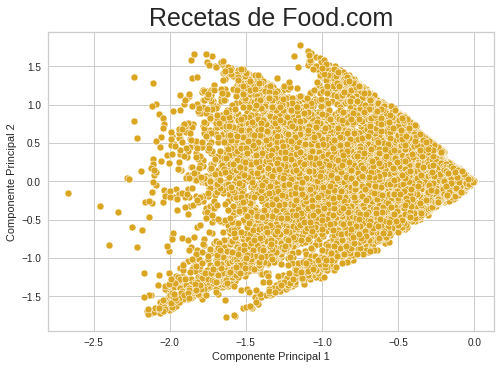

In [ ]:
sns.scatterplot(data=ingr_reducedDF,x='x',y='y', color='goldenrod')
plt.title("Recetas de Food.com",size=25)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

El primer criterio para decidir los grupos será el método de codo, al igual que con la nutricion, iremos desde 2 hasta 15 grupos.

In [ ]:
EvisualizerIngr = KElbowVisualizer(MiniBatchKMeans(random_state=39), k=(2,15))

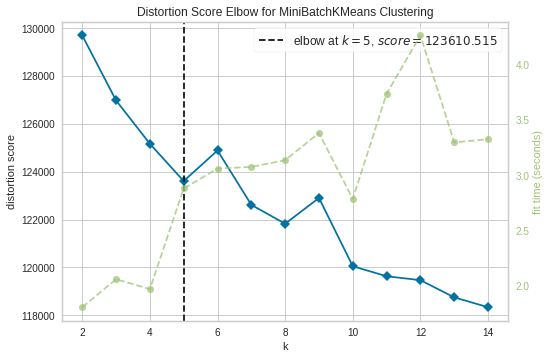

In [ ]:
EvisualizerIngr.fit(rIngredients)
EvisualizerIngr.show()

Vemos que me marca $k=5$ como el mejor, sin embargo, para $k=4$ también hay una disminución considerable del anterior. Además para $k\in[6,9]$ el algoritmo es muy inestable.

El valor de $k$ lo decidiremos usando Silhouette.

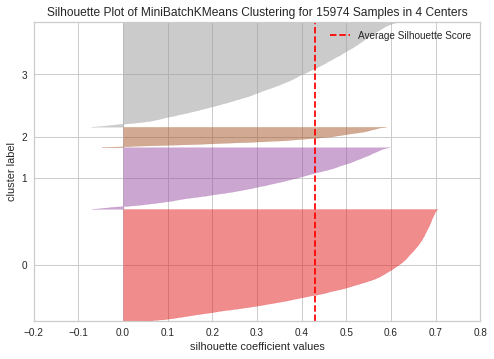

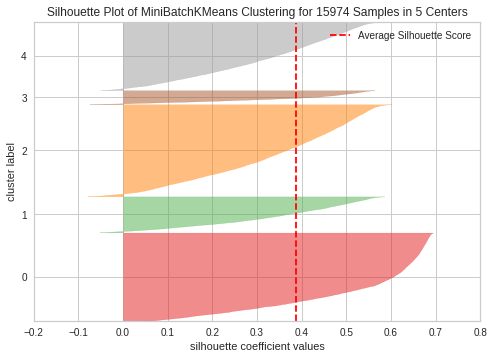

In [ ]:
for k in range(4,6):
    svisualizer = SilhouetteVisualizer(MiniBatchKMeans(n_clusters = k, random_state=39))
    svisualizer.fit(nutrition)        
    svisualizer.show()

Vemos de nuevo que $k=4$ es el valor más conveniente.

In [ ]:
km = MiniBatchKMeans(n_clusters=4, random_state=39)

In [ ]:
km.fit(rIngredients)

MiniBatchKMeans(n_clusters=4, random_state=39)

In [ ]:
ingr_reducedDF['cluster']=km.predict(rnIngr)

In [ ]:
#Guardamos el dataframe
ingr_reducedDF.to_pickle(folder+'clean_ingredients2d_sample.pkl')

Revisamos la distribución

In [ ]:
#Cargamos lo guardado
ingr_reducedDF = pd.read_pickle(folder+'clean_ingredients2d_sample.pkl')

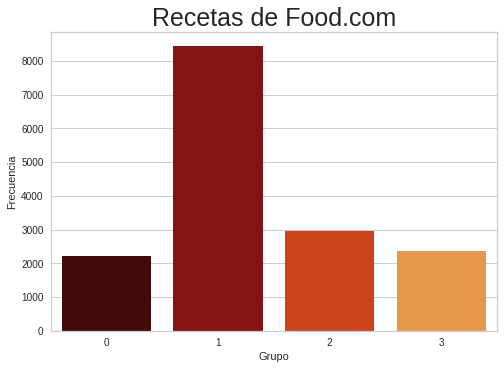

In [ ]:
sns.countplot(x="cluster", data=ingr_reducedDF, palette=paleta)
plt.title("Recetas de Food.com",size=25)
plt.xlabel("Grupo")
plt.ylabel("Frecuencia")
plt.show()

Podríamos comparar con lo obtenido para la información nutrimental.

## Comparación de agrupamientos

In [ ]:
cols_info =['calorías', 'grasas totales (PDV)', 'azúcares (PDV)', 'sodio (PDV)', 
            'proteína(PDV)', 'grasas saturadas (PDV)', 'carbohidratos (PDV)']
colsDict={key:val for key,val in zip(nutrition.columns[:-1],cols_info)}
exS = [dbc.themes.BOOTSTRAP]

app2 = JupyterDash(__name__, external_stylesheets=exS)

controls = dbc.Card(
    [
        html.Div(
            [
                dbc.Label("Representación de recetas"),
                dcc.RadioItems(
                    id="repre",
                    options=[{"label":'Información Nutrimental', "value":'nutri'},
                             {"label":'Ingredientes', "value":'ingr'}],
                    labelStyle={'display': 'block'},
                    value="nutri",
                    style={"margin-bottom": "15px"},
                ),
            ]
        ),
        html.Div(
            [
                dbc.Label("Clasificación a visualizar"),
                dcc.RadioItems(
                    id="clasif",
                    options=[{"label":'Información Nutrimental', "value":'nutri_cls'},
                             {"label":'Ingredientes', "value":'ingr_cls'}],
                    labelStyle={'display': 'block'},
                    value="nutri_cls",
                ),
            ]
        )
        
    ],
    body=True,
)

app2.layout = dbc.Container(
    [
        html.H1("Comparación de K-medias para recetas de Food.com"),
        html.Hr(),
        dbc.Row(
            [
                dbc.Col(controls, md=4),
                dbc.Col(dcc.Graph(id="graph",  figure={}), md=8),
            ],
            align="center",
        ),
        dbc.Row([
                 dbc.Col(id="recipe-name")
        ]),
        dbc.Row(
            [
                dbc.Col(
                    id="nutri_info",md=3
                ),
                dbc.Col(
                    id="ingrs_info",md=3
                ),
                dbc.Col(
                    id="steps_info",md=4
                ),
                dbc.Col(
                    id="cluster_info",md=2
                )
            ]
        )
    ],
    fluid=True,
)
@app2.callback(
    Output("graph", "figure"),
    [
        Input("repre", "value"),
        Input("clasif", "value")
    ],
)
def crear_visualizacion(representacion, clasificacion):
    fig = go.Figure()
    base_ttl = "Agrupamiento de recetas de Food.com usando "
    if representacion=='nutri':
        subtitle = 'Representación de la información nutrimental'
        if clasificacion=='nutri_cls':
            for i in range(4):
                df = nutri_reducedDF[nutri_reducedDF.cluster==i]
                df['name']=recipes.loc[df.index,'name']
                fig.add_trace(go.Scattergl(
                    x=df.x, y=df.y,text=df.name,
                    name='Grupo '+str(i),mode='markers',
                    marker_color=colores[i],
                    customdata=df.index
                    )
                )
            ttl = "la información nutrimental<br><sup>"+subtitle+"</sup>"
        else:
            for i in range(4):
                idx = ingr_reducedDF[ingr_reducedDF.cluster==i].index
                df = nutri_reducedDF.loc[idx]
                df['name']=recipes.loc[df.index,'name']
                fig.add_trace(go.Scattergl(
                    x=df.x, y=df.y,text=df.name,
                    name='Grupo '+str(i),mode='markers',
                    marker_color=colores[i],
                    customdata=df.index
                    )
                )
            
            ttl = "los ingredientes<br><sup>"+subtitle+"</sup>"

    else:
        subtitle = 'Representación de los ingredientes'
        if clasificacion=='nutri_cls':
            subtitle = 'Representación de la información nutrimental'
            for i in range(4):
                idx = nutri_reducedDF[nutri_reducedDF.cluster==i].index
                df = ingr_reducedDF.loc[idx]
                df['name']=recipes.loc[df.index,'name']
                fig.add_trace(go.Scattergl(
                    x=df.x, y=df.y,text=df.name,
                    name='Grupo '+str(i),mode='markers',
                    marker_color=colores[i],
                    customdata=df.index
                    )
                )
            ttl = "los ingredientes<br><sup>"+subtitle+"</sup>"
        else:

            for i in range(4):
                df = ingr_reducedDF[ingr_reducedDF.cluster==i]
                df['name']=recipes.loc[df.index,'name']
                fig.add_trace(go.Scattergl(
                    x=df.x, y=df.y,text=df.name,
                    name='Grupo '+str(i),mode='markers',
                    marker_color=colores[i],
                    customdata=df.index
                    )
                )
            
            ttl = "los ingredientes<br><sup>"+subtitle+"</sup>"
    
    fig.update_layout(
            title=base_ttl+ttl,
            xaxis=dict(title='Componente Principal 1'),
            yaxis=dict(title='Componente Principal 2')
            )
    return fig

@app2.callback(
    [
     Output("recipe-name","children"),
     Output("nutri_info", "children"),
     Output("ingrs_info", "children"),
     Output("steps_info", "children"),
     Output("cluster_info", "children"),
    ],
    [
        Input("graph", "clickData")
    ],
)
def get_recipe_info(clickdata):
    if clickdata is None:
        recipe_name = 'Ninguna receta seleccionada'
        desc=''
        #Informacion nutrimental 
        data_nutri = [{"atr":name, "value": 0} for col,name in colsDict.items()]
        #Ingredientes
        data_ingr = [{"counter":0,"ingr":''}]
        #Pasos
        data_step = [{"counter":0,"step":''}]
        #Cluster
        data_cluster = [{"criteria":'Nutrientes',"group":-1},{"criteria":'Ingredientes',"group":-1}]
        

    else:
        idx = clickdata['points'][0]['customdata']
        recipe_name = clickdata['points'][0]['text']
        recipe_info = recipes.loc[idx]
        desc = recipe_info.description

        #Informacion nutrimental 
        nutri_info = nutrition.loc[idx,nutrition.columns[:-1]]
        data_nutri = [{"atr":name, "value": nutri_info[col]} for col,name in colsDict.items()]
        
        #Ingredientes
        data_ingr = [{"ingr":ing,"counter":i+1} for i,ing in enumerate(recipe_info.ingredients)]

        #Pasos
        data_step = [{"counter":i+1,"step":stp} for i,stp in enumerate(recipe_info.steps)]

        #Cluster
        g_nutri = nutri_reducedDF.loc[idx]['cluster']
        g_ingr = ingr_reducedDF.loc[idx]['cluster']
        data_cluster = [{"criteria":'Nutrientes',"group":g_nutri},{"criteria":'Ingredientes',"group":g_ingr}]


    #Informacion nutrimental 
    columns_nutri =  [{"name": 'Información nutrimental', "id":'atr'}, {"name":'Información nutrimental',"id":'value'}]
    nutri_tab = dash_table.DataTable(
        data=data_nutri, columns=columns_nutri,
        style_as_list_view=True,
        merge_duplicate_headers=True,
        style_header={'fontWeight': 'bold'}
        )
    
    #Ingredientes
    columns_ingr =  [{"name":'Ingredientes', "id":"counter"},{"name": 'Ingredientes', "id":'ingr'}]
    ingr_tab = dash_table.DataTable(
        data=data_ingr, columns=columns_ingr,
        style_as_list_view=True,
        merge_duplicate_headers=True,
        style_data={'whiteSpace': 'normal',
        'height': 'auto',},
        style_header={'fontWeight': 'bold'}
        )
    
    #Pasos
    columns_step =  [{"name":'Pasos', "id":"counter"},{"name": 'Pasos', "id":'step'}]
    step_tab = dash_table.DataTable(
        data=data_step, columns=columns_step,
        style_as_list_view=True,
        merge_duplicate_headers=True,
        style_data={'whiteSpace': 'normal',
        'height': 'auto',},
        style_header={'fontWeight': 'bold'}
        )
    
    #Cluster
    columns_cluster =  [{"name":['Agrupamiento','Criterio'], "id":"criteria"},{"name": ['Agrupamiento','Grupo'], "id":'group'}]
    cluster_tab = dash_table.DataTable(
        data=data_cluster, columns=columns_cluster,
        style_as_list_view=False,
        merge_duplicate_headers=True,
        style_data={'whiteSpace': 'normal',
        'height': 'auto',},
        style_header={'fontWeight': 'bold'}
        )
    
    
    return [html.H3(recipe_name),html.Hr(), html.H6(desc)],nutri_tab,ingr_tab,step_tab, cluster_tab

In [ ]:
app2.run_server(debug=True,port=3011)

In [ ]:
#Para verlo en la propia libreta (no recomendado)
#app2.run_server(mode='inline',port=3011)

Podemos ver que no hay mucho parentezco entre ambos agrupamientos, para ver qué tan separados están podemos tomar métricas como:
* Rand Index
* Información Mutua Normalizada

In [ ]:
from sklearn.metrics.cluster import rand_score,normalized_mutual_info_score

In [ ]:
RI = rand_score(nutri_reducedDF.cluster,ingr_reducedDF.cluster) #rand_index
NMI = normalized_mutual_info_score(nutri_reducedDF.cluster,ingr_reducedDF.cluster) #información mutua normalizada

print(f"Rand Index = {RI:.4f}")
print(f"Información Mutua Normalizada = {NMI:.4f}")

Rand Index = 0.5614
Información Mutua Normalizada = 0.0115


De los resultados podemos apreciar que según el rand index nuestros agrupamientos son más similares que diferentes, sin embargo, no comparten mucha información mutua.